Date: 14.09.2025

Author: Maria Vorotnitskaya

## 1. Data Loading and Preprocessing

Load the data and get initial information about it. Perform the necessary preprocessing. Record the basic information about the data and the preprocessing steps in a brief interim summary.

In [1]:
# Download required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# The path to datasets
data = pd.read_csv('https://code.s3.yandex.net/datasets/insides_data.csv')

# General information
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   visitor_uuid  205510 non-null  object 
 1   user_id       205510 non-null  float64
 2   device_type   205510 non-null  object 
 3   city_id       205510 non-null  int64  
 4   source        205510 non-null  object 
 5   first_date    205510 non-null  object 
 6   visit_id      205510 non-null  int64  
 7   event         205510 non-null  object 
 8   datetime      205510 non-null  object 
 9   rest_id       166915 non-null  object 
 10  object_id     21308 non-null   float64
 11  order_id      7008 non-null    float64
 12  revenue       7008 non-null    float64
 13  delivery      7008 non-null    float64
 14  commission    21308 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 23.5+ MB


The analysis of the obtained data reveals the following: the dataset contains a total of 205,510 rows and 15 columns.

The columns visitor_uuid, device_type, city_id, source, and event show no apparent missing values or incorrect data types. However, it is worth verifying that visitor_uuid is indeed intended to be a string type. The user_id column is fully populated but is stored as a float64 (likely due to NaN values during export); it should most likely be converted to the Int64 type. The first_date and datetime columns require their data type to be changed from string to datetime.

The columns rest_id (166,915 non-null), object_id (21,308 non-null), order_id, revenue, delivery (7,008 non-null), and commission (21,308 non-null) are only partially filled. It is necessary to investigate the relationship between these missing values.

We will also check this dataset for duplicates and anomalies.

In [7]:
# Convert dates
data['first_date'] = pd.to_datetime(data['first_date'])
data['datetime'] = pd.to_datetime(data['datetime'])

data['user_id'] = data['user_id'].astype('Int64')
data['order_id'] = data['order_id'].astype('Int64')

In [8]:
# Print the first 20 lines
data.head(20)

,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,<NA>,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,<NA>,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,<NA>,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,<NA>,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,<NA>,NaN,NaN,NaN
5,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:40,2c6095730b514c189ee41c65f03febc3,NaN,<NA>,NaN,NaN,NaN
6,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:50,1be5a933aab34fbab594bebba48e976e,NaN,<NA>,NaN,NaN,NaN
7,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:10:04,39b7eab4f4704ed2886fafe171489960,NaN,<NA>,NaN,NaN,NaN
8,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:10:12,39b7eab4f4704ed2886fafe171489960,NaN,<NA>,NaN,NaN,NaN
9,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:10:28,55d6470712ee48e98509478ad6aa18ee,NaN,<NA>,NaN,NaN,NaN


It is clear that the missing values in the dataset are logically conditioned. The `rest_id` column is filled only when the action is related to a restaurant; `object_id` appears only for dish cards and orders; `order_id`, `revenue`, and `delivery` are only present for orders; and `commission` is populated only where there is a restaurant/dish involved. This essentially represents different levels of event granularity. Now, let's proceed with converting the data types for specific columns.

In [15]:
# Checking for duplicates
data.duplicated().sum()

# Checking for implicit duplicates (by key fields)
duplicates = data.duplicated(subset=['user_id', 'datetime', 'event']).sum()
print(f"Number of implicit duplicates: {duplicates}")

# Checking the number of unique users and restaurants.
unique_users = data['user_id'].nunique()
unique_restaurants = data['rest_id'].nunique()
print(f"Unique users: {unique_users}")
print(f"Unique restaurants: {unique_restaurants}")

unique_orders = data['order_id'].nunique()
unique_dishes = data['object_id'].nunique()
print(f"Unique orders: {unique_orders}")
print(f"Unique dishes: {unique_dishes}")

date_min = data['datetime'].min()
date_max = data['datetime'].max()
print(f"The data is presented for the period: {date_min} — {date_max}")

Number of implicit duplicates: 0
Unique users: 8473
Unique restaurants: 21
Unique orders: 4443
Unique dishes: 603
The data is presented for the period: 2021-05-01 00:10:55 — 2021-07-02 00:12:08


In [10]:
# Removing implicit duplicates
data = data.drop_duplicates(subset=['user_id','datetime','event'])

At the moment, we can say that the data preprocessing has been done well, as we have adjusted all the data to the right type and performed the necessary check for "dirty" omissions and duplicates.

---

## 2. User Path Analysis

Marketers began to notice the following: money is still being spent on advertising, and there are fewer orders. And this is despite the fact that the application is being downloaded and installed as actively as before. It feels like the users are getting lost somewhere. At the same time, the share of orders from the desktop version of the app increased compared to the mobile version.

The developers say that the latest updates to the mobile version of the application should not have affected the catalog of dishes or its choice for ordering and subsequent payment for delivery, as the changes concerned the new algorithm for confirming the mobile phone and the delivery address.

Use funnels to study the general user path of new users, then compare the behavior of users of the mobile and desktop versions of the application.

**Task 2.1.** Build and visualize the overall funnel (based on all data), then describe the user journey: which stages are present, what is their sequence, and at which stage (or stages) the majority of new users are lost.

When solving the task, build two types of funnels:

- **A classic funnel** — showing the percentage relative to the first step.

- **A step-by-step funnel** — showing the conversion rate from the previous stage.

It is assumed that a user follows this path to place an order for dish delivery from restaurants:

1. `authorization` — user authorization / app launch.

2. `main_page` — loading the main application page.

3. `reg_page` — navigating to the registration page.

4. `confirm_phone` — phone confirmation (completing the registration process).

5. `object_page` — dish page.

6. `add_to_cart` — proceeding to the cart.

7. `order` — placing an order.

In [11]:
# Selecting funnel steps
steps = ['authorization', 'main_page', 'reg_page', 'confirm_phone', 'object_page', 'add_to_cart', 'order']

# Selecting new users
first_event_date = data.groupby('visitor_uuid')['datetime'].min().dt.date.rename('first_event_date')
first_date_per_visitor = data.groupby('visitor_uuid')['first_date'].first().rename('first_date')
visitors = pd.concat([first_event_date, first_date_per_visitor], axis=1)
visitors['is_new'] = visitors['first_event_date'] == visitors['first_date']
new_visitors = visitors[visitors['is_new']].index.tolist()

data_new = data[data['visitor_uuid'].isin(new_visitors)].copy()

# Creating a table of events
ev = (data_new[data_new['event'].isin(steps)]
      .sort_values('datetime')
      .groupby(['visitor_uuid','event'])['datetime']
      .min()
      .unstack(fill_value=pd.NaT))

for s in steps:
    if s not in ev.columns:
        ev[s] = pd.NaT
ev = ev[steps]

General funnel (new users):


,count,classic_%,step_%
authorization,6931,100.00,NaN
main_page,6068,87.55,87.55
reg_page,5649,81.50,93.09
confirm_phone,4347,62.72,76.95
object_page,2946,42.50,67.77
add_to_cart,2223,32.07,75.46
order,1795,25.90,80.75


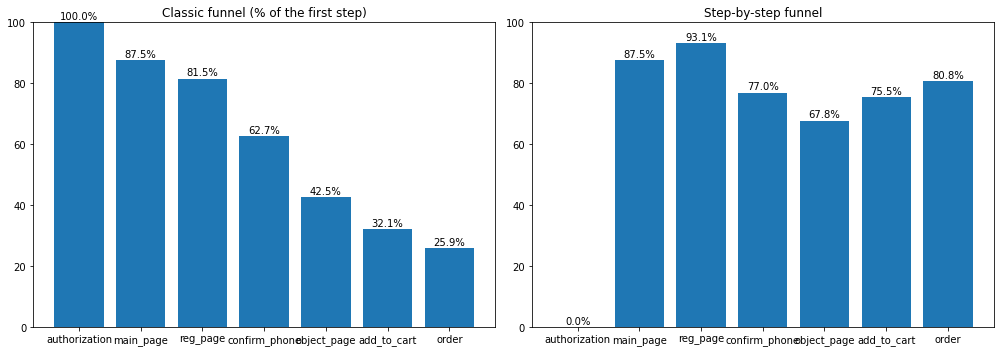

In [12]:
# Counting the funnel
def funnel_counts(ev_df, steps):
    counts = {}
    for step in steps:
        counts[step] = ev_df[step].notna().sum()
    return pd.Series(counts)

# The number of users at each step
counts = funnel_counts(ev, steps)

# A table with metrics
funnel = pd.DataFrame(index=steps)
funnel['count'] = counts
funnel['classic_%'] = funnel['count'] / funnel['count'].iloc[0] * 100
funnel['step_%'] = funnel['count'] / funnel['count'].shift(1) * 100
funnel = funnel.round(2)

print("General funnel (new users):")
display(funnel)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# The classic funnel
axes[0].bar(funnel.index, funnel['classic_%'])
axes[0].set_ylim(0, 100)
axes[0].set_title('Classic funnel (% of the first step)')
for i, v in enumerate(funnel['classic_%']):
    axes[0].text(i, v + 1, f"{v:.1f}%", ha='center')

# Step-by-step funnel
axes[1].bar(funnel.index, funnel['step_%'].fillna(0))
axes[1].set_ylim(0, 100)
axes[1].set_title('Step-by-step funnel')
for i, v in enumerate(funnel['step_%'].fillna(0)):
    axes[1].text(i, v + 1, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

The constructed funnels reveal that a significant user drop-off occurs at the registration and phone confirmation stages. Although 26% of new users proceed to place an order, the verification process itself appears to be the most vulnerable point. This is linked to recent changes in the algorithm for verifying mobile phone numbers and delivery addresses.

**Task 2.2.** Compare the user journey between the two applications: the mobile version and the desktop version. To do this, build and visualize **two step-by-step funnels**: for new users of the **mobile** and **desktop** versions of the application.

Compare the results with each other and analyze whether there are differences in the user journey for the different applications. Describe the results of the comparison in a brief **interim conclusion**.

In [13]:
first_device = data_new.sort_values('datetime').groupby('visitor_uuid')['device_type'].first().rename('first_device')
ev = (data_new[data_new['event'].isin(steps)]
       .sort_values('datetime')
       .groupby(['visitor_uuid','event'])['datetime']
       .min()
       .unstack(fill_value=pd.NaT))
 
for s in steps:
    if s not in ev.columns:
        ev[s] = pd.NaT
        ev = ev[steps]

# Simple counting function
def counts_by_step(ev_df, steps):
    return ev_df[steps].notna().sum()

# Count for each device 
devices_to_compare = [d for d in ['Desktop','Mobile'] if d in first_device.unique().tolist()]
counts_by_device = {}
step_pct_by_device = {}

for dev in devices_to_compare:
    uids = first_device[first_device == dev].index
    ev_sub = ev.reindex(uids).fillna(pd.NaT)

    counts = counts_by_step(ev_sub, steps)
    counts_by_device[dev] = counts

    step_pct = []
    for i, cur in enumerate(steps):
        if i == 0:
            step_pct.append(np.nan)
            continue
        prev = steps[i-1]
        prev_mask_sum = ev_sub[prev].notna().sum()
        both_sum = (ev_sub[prev].notna() & ev_sub[cur].notna()).sum()
        pct = (both_sum / prev_mask_sum * 100) if prev_mask_sum > 0 else np.nan
        step_pct.append(round(pct, 2))
    step_pct_by_device[dev] = step_pct

counts_df = pd.DataFrame(counts_by_device).astype(int)
step_pct_df = pd.DataFrame(step_pct_by_device, index=steps).round(2)

Absolute numbers:


,Desktop,Mobile
event,,
authorization,4305,2626
main_page,3882,2186
reg_page,3546,2103
confirm_phone,3197,1150
object_page,2246,700
add_to_cart,1651,572
order,1315,480



Step-by-step conversion rate (%):


,Desktop,Mobile
authorization,NaN,NaN
main_page,82.07,76.09
reg_page,73.47,69.85
confirm_phone,89.59,54.59
object_page,64.06,47.39
add_to_cart,57.70,53.14
order,61.66,60.31



Number of users with the 'order' event by device:
Desktop    1315
Mobile      480
Name: order, dtype: int32


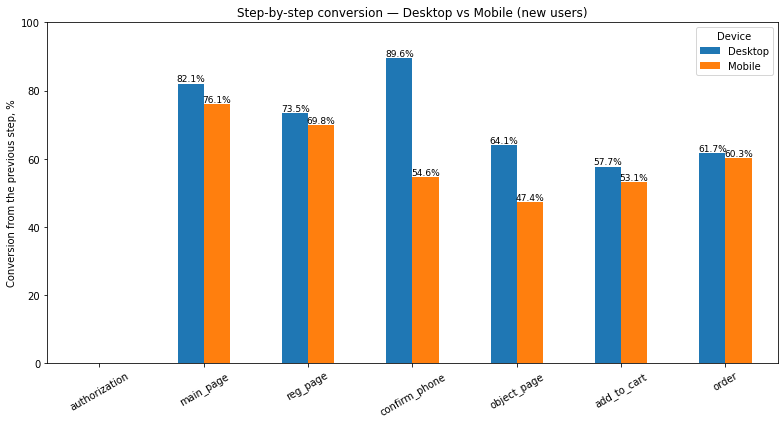

In [16]:
print("Absolute numbers:")
display(counts_df)

print("\nStep-by-step conversion rate (%):")
display(step_pct_df)
print("\nNumber of users with the 'order' event by device:")
print(counts_df.loc['order'])

fig, ax = plt.subplots(figsize=(11,6))
step_pct_df.plot(kind='bar', ax=ax)
ax.set_ylabel('Conversion from the previous step, %')
ax.set_ylim(0, 100)
ax.set_title('Step-by-step conversion — Desktop vs Mobile (new users)')
ax.legend(title='Device')
plt.xticks(rotation=30)

for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

The key problem of the mobile application is a sharp failure at the stage of mobile phone verification. After registration, mobile users get noticeably more lost: they go to view dishes worse, add them to the basket less often and place an order.

As a result, 480 out of 2,626 new mobile users placed an order, and 1,315 out of 4,305 desktop users. This confirms the observations of marketers: mobile users actively download the application, but disappear during registration, which leads to a significant decrease in the number of orders.

---

## 3. RFM Segmentation

The food delivery service has relatively low user retention: approximately 14% of visitors return on the first day, and by the seventh day, this drops to just 4-5%. Marketing specialists want to launch several advertising campaigns aimed at retaining paying users and bringing them back to the service if they haven't placed orders for a long time.

To achieve this, it's necessary to segment users into different behavioral segments using RFM segmentation based on three metrics:

- **Recency**

- **Frequency**

- **Monetary**

Set the analysis date to **July 3, 2021**.

**Task 3.1.** For each customer, calculate:

- The number of days since their last purchase — Recency (R);

- Purchase Frequency (F);

- The total value of all purchases — Monetary (M).

Set the analysis date to **July 3, 2021**. After this, build three histograms and analyze them.

In [17]:
# Date of analysis
analysis_date = pd.to_datetime("2021-07-03")

orders = data[data['event'] == 'order'].copy()

# RFM grouping
rfm = (orders.groupby('user_id')
              .agg({
                  'datetime': lambda x: (analysis_date - x.max()).days,
                  'order_id': 'nunique',
                  'revenue': 'sum'
              })
              .rename(columns={'datetime': 'Recency',
                               'order_id': 'Frequency',
                               'revenue': 'Monetary'}))

rfm.head()

,Recency,Frequency,Monetary
user_id,,,
5506,32,2,3752.00
6291,57,1,1750.00
6820,41,1,1260.14
11062,57,1,3785.60
13254,54,1,553.00


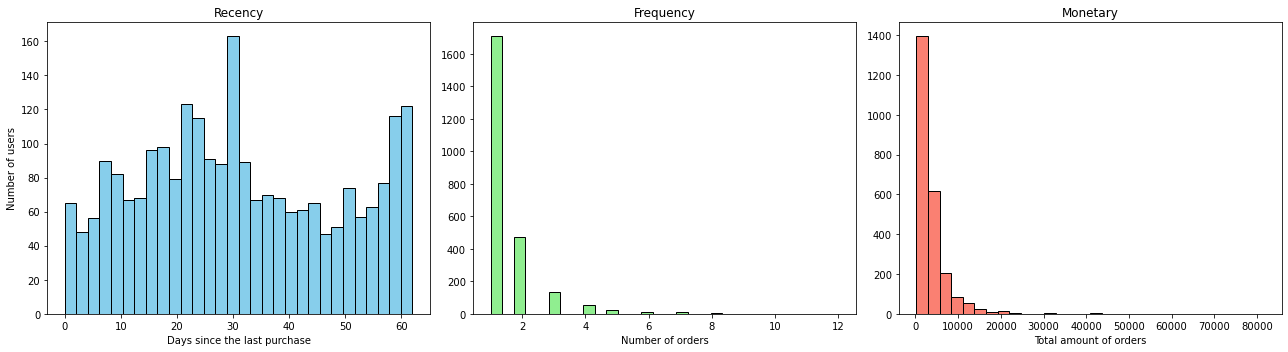

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Recency')
axes[0].set_xlabel('Days since the last purchase')
axes[0].set_ylabel('Number of users')

axes[1].hist(rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency')
axes[1].set_xlabel('Number of orders')

axes[2].hist(rfm['Monetary'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Monetary')
axes[2].set_xlabel('Total amount of orders')

plt.tight_layout()
plt.show()

According to the results obtained, the service has problems with retention: there are many one-time buyers, there are regular users, but they quickly stop returning.

**Task 3.2.** Identify **RFM segments** and study the distribution of users across them.

Apply the following approaches to identify RFM segments:
- **Recency** — divide into three equal groups.
- **Frequency** — divide into three groups:
    - users with 1 order (F-segment with low number of orders);
    - users with 2 orders (F-segment with medium number of orders);
    - users with 3 or more orders (F-segment with high number of orders).
- **Monetary** — divide into three groups using the 33rd and 66th percentiles.

After that, calculate the number of customers in each segment, draw intermediate conclusions, and provide recommendations.

In [19]:
rfm_seg = rfm.copy()
recency_min = rfm_seg['Recency'].min()
recency_max = rfm_seg['Recency'].max()
interval = (recency_max - recency_min) / 3
recency_bins = [recency_min, recency_min + interval, recency_min + 2*interval, recency_max]

rfm_seg['R_score'] = pd.cut(rfm_seg['Recency'], bins=recency_bins, labels=[3, 2, 1], include_lowest=True)

def f_segment(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3

rfm_seg['F_score'] = rfm_seg['Frequency'].apply(f_segment)

m_bins = rfm_seg['Monetary'].quantile([0, 0.33, 0.66, 1]).values
rfm_seg['M_score'] = pd.cut(rfm_seg['Monetary'], bins=m_bins, labels=[1, 2, 3], include_lowest=True)

rfm_seg['RFM_segment'] = (
    rfm_seg['R_score'].astype(str) + 
    rfm_seg['F_score'].astype(str) + 
    rfm_seg['M_score'].astype(str)
)

rfm_seg.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_segment
user_id,,,,,,,
5506,32,2,3752.00,2,2,3,223
6291,57,1,1750.00,1,1,1,111
6820,41,1,1260.14,2,1,1,211
11062,57,1,3785.60,1,1,3,113
13254,54,1,553.00,1,1,1,111


In [20]:
# Reviewer's code:
display(rfm_seg.groupby('Recency')['Recency'].max())

# Calculate three equal intervals:
(rfm_seg['Recency'].max() - rfm_seg['Recency'].min())  / 3

Recency
0      0
1      1
2      2
3      3
4      4
      ..
58    58
59    59
60    60
61    61
62    62
Name: Recency, Length: 63, dtype: int64

20.666666666666668

In [21]:
print("Distribution by Recency:")
print(rfm_seg['R_score'].value_counts().sort_index())

print("\nDistribution by Frequency:")
print(rfm_seg['F_score'].value_counts().sort_index())

print("\nDistribution by Monetary:")
print(rfm_seg['M_score'].value_counts().sort_index())

seg_counts = rfm_seg['RFM_segment'].value_counts()
print("\nTop-10 RFM-segments:")
print(seg_counts.head(10))

Distribution by Recency:
3    749
2    934
1    733
Name: R_score, dtype: int64

Distribution by Frequency:
1    1709
2     473
3     234
Name: F_score, dtype: int64

Distribution by Monetary:
1    800
2    794
3    822
Name: M_score, dtype: int64

Top-10 RFM-segments:
211    280
111    244
311    244
212    234
112    210
312    185
213    126
223    119
233    105
313    102
Name: RFM_segment, dtype: int64


In the end, it is evident that the majority of clients have placed only one order, yet a portion of these clients generate medium or high revenue.

Segment Recommendations:
- Segments with 1 order (F=1): Motivate them to make a repeat purchase via email campaigns, promotions, and discounts on their second order. For high-value clients (M=3), consider introducing personalized offers and upselling.

- Segments with 2-3 orders (F=2-3): Stimulate LTV growth through cross-selling and loyalty programs. For medium and high-value clients (M=2-3), offer VIP deals and premium subscriptions.

- Segments with low activity (R=1-2): Reactivate these "dormant" customers using personalized emails, retargeting campaigns, and special bonuses.

- Segments of recent clients (R=3): Focus on retention and repeat purchases. Offer registration bonuses and rewards for their first repeat order.

---

## 4. K-Means Clustering

To better understand restaurant behavior and offer them personalized partnership terms, as well as create personalized offers for users, marketing specialists have requested clustering restaurants based on the following parameters:

- total number of orders;

- average order value;

- total number of unique dishes ordered (restaurant assortment).

Using the K-Means method, segment restaurants into clusters that reflect different business models and target segments. This allows identifying groups of restaurants with similar characteristics and developing effective marketing strategies for them.

**Task 4.1.** Prepare the data for clustering and for each restaurant calculate:

- total number of orders;

- average order value;

- total number of unique dishes ordered (restaurant assortment).

In [22]:
orders = data[data['event'] == 'order'].copy()

# Grouping by restaurants
rest_stats = orders.groupby('rest_id').agg({
    'order_id': 'nunique',
    'revenue': 'mean',
    'object_id': 'nunique'
}).reset_index()

rest_stats = rest_stats.rename(columns={
    'order_id': 'total_orders',
    'revenue': 'avg_order_value',
    'object_id': 'unique_dishes'
})

rest_stats.head()

,rest_id,total_orders,avg_order_value,unique_dishes
0,1be5a933aab34fbab594bebba48e976e,144,2260.180222,28
1,1d6bb74687104fa1953924c9684fe624,108,2959.256481,19
2,2c6095730b514c189ee41c65f03febc3,8,1673.000000,4
3,3247a3b5f9494812a3c1a73c5b61f004,33,2777.209697,4
4,39b7eab4f4704ed2886fafe171489960,33,2011.269697,5


At this stage, it is already evident that restaurants can be divided into several segments: popular, less popular, premium-priced, and mid-priced, with either a broad or narrow assortment.

**Task 4.2.** Normalize the data and find the optimal number of clusters using the `.inertia_` method. Plot the relationship between inertia and the number of clusters (the "elbow" method) and suggest the optimal number of clusters.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


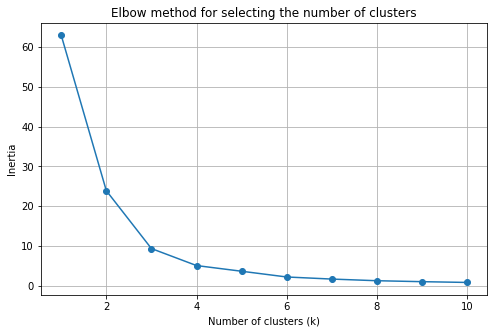

In [23]:
X = rest_stats[['total_orders', 'avg_order_value', 'unique_dishes']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method for selecting the number of clusters')
plt.grid(True)
plt.show()

Interpreting this graph, it is worth noting that k=3 is the basic and most logical number of clusters in this case. We can use three restaurant segments. Such as popular, average, and unpopular.

**Task 4.3.** Perform clustering, analyze the obtained results, and calculate the average values for each cluster.

After that, visualize the results to examine the relationships between features. Create two visualizations showing all clusters:

- average check size versus number of orders;

- number of dishes versus number of orders.

Then describe each cluster in an interim conclusion.

In [25]:
# Берём данные
X = rest_stats[['total_orders', 'avg_order_value', 'unique_dishes']]

# Нормализация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rest_stats['cluster'] = kmeans.fit_predict(X_scaled)

# Средние значения по кластерам
cluster_summary = rest_stats.groupby('cluster').agg({
    'total_orders': 'mean',
    'avg_order_value': 'mean',
    'unique_dishes': 'mean',
    'rest_id': 'count'
}).rename(columns={'rest_id': 'restaurants_count'}).reset_index()

print(cluster_summary)

   cluster  total_orders  avg_order_value  unique_dishes  restaurants_count
0        0         69.60      2167.856491            9.0                 15
1        1       1100.00      2498.828802           83.0                  2
2        2         76.25      4048.497783            5.0                  4


Cluster Insights:

- Cluster 0 — Small restaurants with a low number of orders. To stimulate growth, focus on increasing order volume through promotions, discounts, or targeted marketing campaigns.

- Cluster 1 — Top-performing restaurants with high sales volume and a wide assortment.

- Cluster 2 — Restaurants with a high average check but a limited menu. Their primary value proposition lies in their premium pricing.

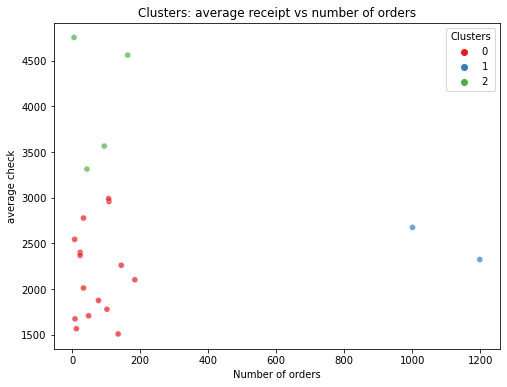

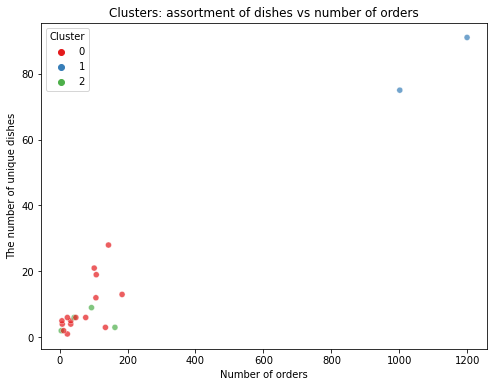

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=rest_stats, x='total_orders', y='avg_order_value',
                hue='cluster', palette='Set1', alpha=0.7)
plt.title('Clusters: average receipt vs number of orders')
plt.xlabel('Number of orders')
plt.ylabel('average check')
plt.legend(title='Clusters')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=rest_stats, x='total_orders', y='unique_dishes',
                hue='cluster', palette='Set1', alpha=0.7)
plt.title('Clusters: assortment of dishes vs number of orders')
plt.xlabel('Number of orders')
plt.ylabel('The number of unique dishes')
plt.legend(title='Cluster')
plt.show()

According to the data obtained, it can be concluded that the service operates mainly due to a few popular restaurants that have a wide range and a lot of orders. There are also premium restaurants that have a high price and a limited range. Most restaurants fall into cluster 0, which is low by all metrics. Perhaps they need advertising promotions.

---

## 5. Final conclusions and recommendations

Formulate a general conclusion. Record the main results and insights that, in your opinion, will help the business improve the product.

The conclusions should be brief and concise, as they will be read by your customer, product manager, and product team.

Currently, the service maintains a stable flow of new users and orders from top restaurants, but loses nearly all new customers at the initial stage and struggles with repeat purchases.

Segment Recommendations:

Segments with 1 order (F=1): Motivate repeat purchases through email campaigns, promotions, and discounts on second orders. For high-value customers (M=3), introduce personalized offers and upselling.

Segments with 2-3 orders (F=2-3): Stimulate LTV growth through cross-selling and loyalty programs. For medium and high-value customers (M=2-3), offer VIP deals and premium subscriptions.

Segments with low activity (R=1-2): Reactivate dormant customers through personalized emails, retargeting, and bonuses.

Segments of recent customers (R=3): Focus on retention and repeat purchases with registration bonuses and rewards for first repeat orders.

Clustering Insights:
As previously noted, the service relies heavily on Cluster 1 restaurants - those with high order volumes and broad assortments that generate most revenue. Cluster 2 represents premium establishments with low order frequency but very high average checks. However, the majority of restaurants fall into Cluster 0: characterized by low average checks, limited menus, and few orders. These venues would benefit from marketing support and menu improvements to boost activity.

Overall Recommendation:
Priority improvements should focus on streamlining mobile registration, enhancing customer retention strategies, and developing support programs for underperforming restaurants.